In [ ]:
# tips 데이터셋 이용

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # 축의 음수 기호 표시

from sklearn.preprocessing import StandardScaler



In [44]:
## 경고 메시지 표시 안함
import warnings
warnings.filterwarnings(action='ignore')

In [45]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
### 1. 기본 정보 확인 

In [46]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
### 2. 결측치 확인  (개수)

In [47]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [48]:
tips.dtypes


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [5]:
### 3. 수치형 변수들만 선택하여 num변수에 저장하기 

In [51]:
# num = tips.select_dtypes(include='number')
# num

In [49]:
num = ['total_bill','tip','size']

In [6]:
###4. 결측치 처리 (평균값으로 처리하기)

In [51]:
tips[num]= tips[num].fillna(tips[num].mean())

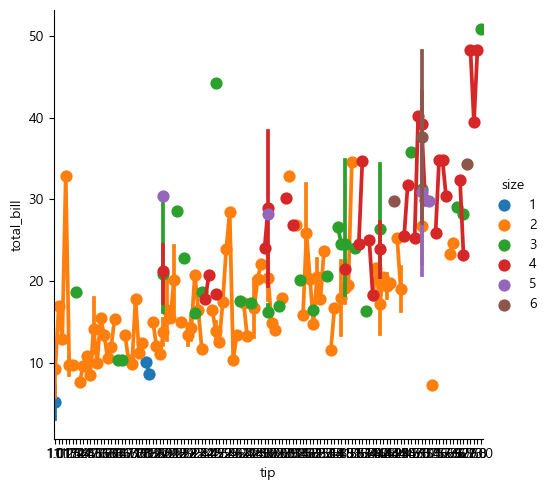

In [55]:
sns.catplot(x='tip', y='total_bill', hue='size', data = tips,kind='point')

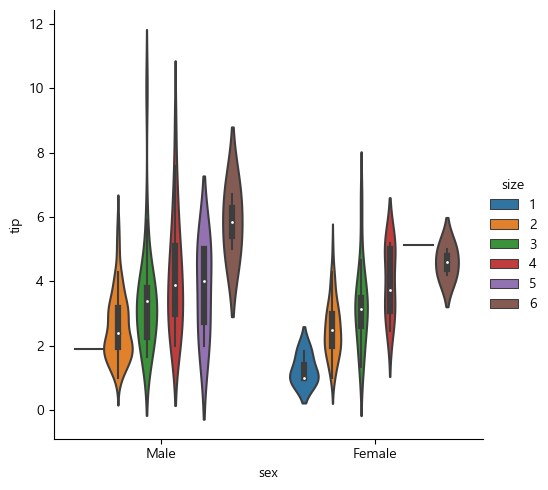

In [58]:
sns.catplot(x='sex', y='tip', hue='size', data = tips,kind='violin')

In [8]:
# tips.loc[:,num] = tips[num].fillna(tips[num].mean())

In [ ]:
### 5. 수치형 변수들을 표준화

In [37]:
scaler = StandardScaler()
tips[num] = scaler.fit_transform(tips[num])
tips

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193


In [38]:
### 6 범주형 데이터들을 수치형으로 변환 ( sex, smoker, day, time)

In [39]:
col = ['sex','smoker','day','time']

for r in col:
    tips[r + '_encoded'] =pd.Categorical(tips[r]).codes

tips

,total_bill,tip,sex,smoker,day,time,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193,1,1,3,1
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383,0,1,3,1
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383,0,1,3,1
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193,0,1,3,1
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383,0,1,2,1
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193,1,0,2,1
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193,0,0,2,1
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193,0,1,2,1


In [24]:
# tips['sex_'] = tips['sex'].map({'Male':0, 'Female':1})
# tips['smoker_'] = tips['smoker'].map({'No':0, 'Yes':1})
# tips['day_'] = tips['day'].map({'Sun':0, 'Thur':1, 'Fri':2, 'Sat':3})
# tips['time_'] = tips['time'].map({'Dinner':0, 'Lunch':1})
# tips

In [ ]:
### 7. 상관분석(상관계수)

In [40]:
corr_matrix=tips.corr()   
corr_matrix

,total_bill,tip,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
total_bill,1.000000,0.675734,0.598315,-0.144877,-0.085721,0.173693,0.183118
tip,0.675734,1.000000,0.489299,-0.088862,-0.005929,0.135499,0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.133178,0.165350,0.103411
sex_encoded,-0.144877,-0.088862,-0.086195,1.000000,0.002816,-0.230791,-0.205231
smoker_encoded,-0.085721,-0.005929,0.133178,0.002816,1.000000,0.032653,-0.054921
day_encoded,0.173693,0.135499,0.165350,-0.230791,0.032653,1.000000,0.874366
time_encoded,0.183118,0.121629,0.103411,-0.205231,-0.054921,0.874366,1.000000


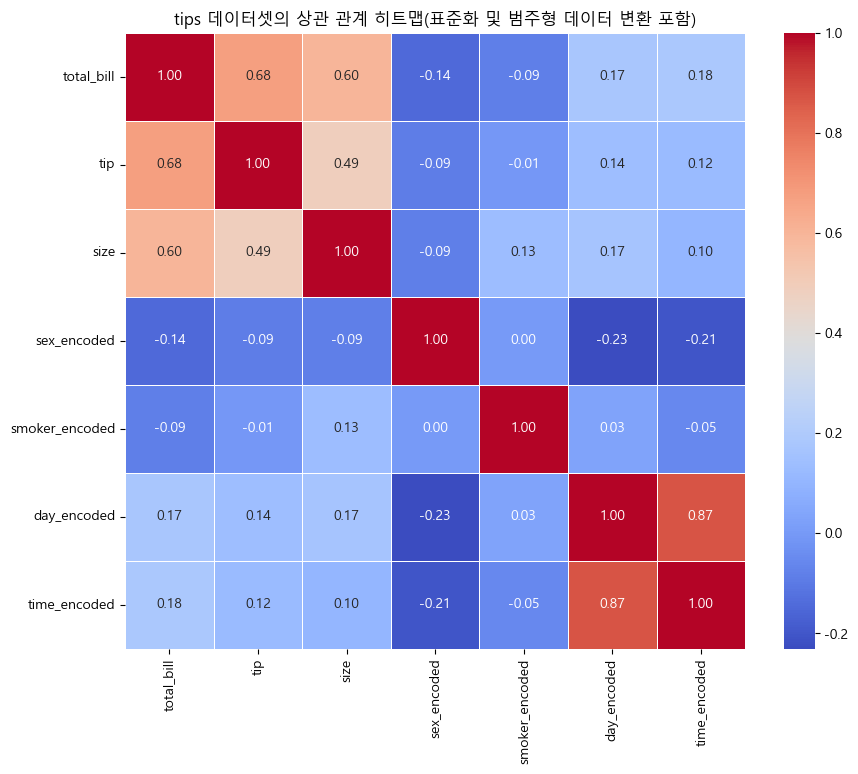

In [42]:
### 8. 히트맵 그리기

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('tips 데이터셋의 상관 관계 히트맵(표준화 및 범주형 데이터 변환 포함)')
plt.show()